In [502]:
import numpy as np
import pandas as py
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data = py.read_csv('train (3).csv')
testData = py.read_csv('test (2).csv')

In [503]:
data.isnull().sum()
data.head()
data['Ticket'].head(100)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
20              239865
21              248698
22              330923
23              113788
24              349909
25              347077
26                2631
27               19950
28              330959
29              349216
            ...       
70          C.A. 33111
71             CA 2144
72        S.O.C. 14879
73                2680
74                1601
75              348123
76              349208
77              374746
78              248738
79              364516
80              345767
81              345779
82         

In [504]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [505]:
data['Name'].str.extract(', ([a-zA-Z\s]+)\.',expand=False).value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Ms                1
Mme               1
Don               1
Jonkheer          1
Capt              1
Lady              1
Sir               1
the Countess      1
Name: Name, dtype: int64

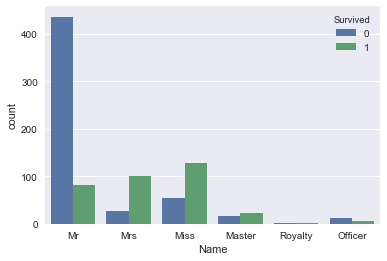

In [506]:
titleMapping = {"Capt":       "Officer",
                "Col":        "Officer",
                "Major":      "Officer",
                "Jonkheer":   "Royalty",
                "Don":        "Royalty",
                "Sir" :       "Royalty",
                "Dr":         "Officer",
                "Rev":        "Officer",
                "the Countess":   "Royalty",
                "Don":       "Royalty",
                "Dona":       "Royalty",
                "Mme":        "Mrs",
                "Mlle":       "Miss",
                "Ms":         "Mrs",
                "Mr" :        "Mr",
                "Mrs" :       "Mrs",
                "Miss" :      "Miss",
                "Master" :    "Master",
                "Lady" :      "Royalty"}
titlecodeMapping = {"Mr" : 0,"Miss" : 1, "Mrs":2,"Royalty" : 3,"Master" : 4, "Officer" : 5}
sns.countplot(CheckTitle,hue=data['Survived'])

In [507]:
#Modify the title first
data['Title'] =  data['Name'].str.extract(', ([a-zA-Z\s]+)\. ',expand=False).map(titleMapping).map(titlecodeMapping)
#data['Title'] =  data['Name'].str.extract(', ([a-zA-Z\s]+)\. ',expand=False)
#data['Title'].value_counts()
#title = py.get_dummies(data['Title'],drop_first=True)
#data = py.concat([data,title],axis=1)
#data.drop(['Title'],axis=1,inplace=True)
testData['Title'] = testData['Name'].str.extract(', ([a-zA-Z\s]+)\. ',expand=False).map(titleMapping).map(titlecodeMapping)
#titletest=py.get_dummies(testData['Title'],drop_first=True)
#testData = py.concat([testData,titletest],axis=1)
#testData.drop(['Title'],axis=1,inplace=True)
data.isnull().sum()
for index, row in testData.iterrows():
    if np.isnan(row['Title']):
        print(row)
        x = row['Name']
        #x = row['Name'].extract(', ([a-zA-Z]+)\. ',expand=False)
        #print(x)
        


     PassengerId  Survived  Pclass  \
759          760         1       1   

                                                  Name     Sex   Age  SibSp  \
759  Rothes, the Countess. of (Lucy Noel Martha Dye...  female  33.0      0   

     Parch  Ticket  Fare Cabin Embarked  Title  
759      0  110152  86.5   B77        S      3  


In [508]:
#process nameLength
data['nameLen'] = data['Name'].apply(lambda x: len(x))
data['FamilySize'] = data['SibSp'] + data['Parch']+1
data.drop(['SibSp','Parch','Name'],axis=1,inplace=True)
#process nameLength for testData
testData['nameLen'] = testData['Name'].apply(lambda x: len(x))
testData['FamilySize'] = testData['SibSp'] + testData['Parch']+1
testData.drop(['SibSp','Parch','Name'],axis=1,inplace=True)


In [509]:
#process Cabin
data['Cabin'] = data['Cabin'].fillna('U')
data['Cabin'] = data['Cabin'].apply(lambda x: x[0])
cabin = py.get_dummies(data['Cabin'],drop_first=True)
data.drop(['Cabin'],axis=1,inplace=True)
data = py.concat([data,cabin],axis=1)
data.isnull().sum()
#process cabin for test data
testData['Cabin'] = testData['Cabin'].fillna('U')
testData['Cabin'] = testData['Cabin'].apply(lambda x: x[0])
cabin = py.get_dummies(testData['Cabin'],drop_first=True)
testData.isnull().sum()
testData.drop(['Cabin'],axis=1,inplace=True)
testData = py.concat([testData,cabin],axis=1)
testData['T']=py.DataFrame(np.zeros(testData.shape[0]))

In [510]:
data.groupby(['Sex','Pclass','Title'])['Age'].median()

Sex     Pclass  Title
female  1       1        30.0
                2        40.0
                3        40.5
                5        49.0
        2       1        24.0
                2        31.5
        3       1        18.0
                2        31.0
male    1       0        40.0
                3        40.0
                4         4.0
                5        51.0
        2       0        31.0
                4         1.0
                5        46.5
        3       0        26.0
                4         4.0
Name: Age, dtype: float64

In [511]:
#process age with Pclass, Sex,Title params
def processAge(x):
    if x['Sex'] == 'female' and x['Pclass'] == 1:
        if x['Title'] == 1:
            return 30
        if x['Title'] == 2:
            return 40
        if x['Title'] == 3:
            return 41
        if x['Title'] == 5:
            return 49
    if x['Sex'] == 'female' and x['Pclass'] == 2:
        if x['Title'] == 1:
            return 24
        if x['Title'] == 2:
            return 32
    if x['Sex'] == 'female' and x['Pclass'] == 3:
         if x['Title'] == 1:
            return 18
         if x['Title'] == 2:
            return 31
    if x['Sex'] == 'male' and x['Pclass'] == 1:
        if x['Title'] == 0:
            return 40
        if x['Title'] == 3:
            return 40
        if x['Title'] == 4:
            return 4
        if x['Title'] == 5:
            return 51
    if x['Sex'] == 'male' and x['Pclass'] == 2:
        if x['Title'] == 0:
            return 31
        if x['Title'] == 4:
            return 1
        if x['Title'] == 5:
            return 47
    if x['Sex'] == 'male' and x['Pclass'] == 3:
        if x['Title'] == 0:
            return 26
        if x['Title'] == 4:
            return 4
data['Age'] = data.apply(lambda x : processAge(x) if np.isnan(x['Age']) else x['Age'],axis=1)
#processAge
#data['Age'] = data['Age'].fillna(data['Age'].mean())
#data.isnull().sum()
#processAge
#testData['Age'] = testData['Age'].fillna(testData['Age'].mean())
testData['Age'] = testData.apply(lambda x : processAge(x) if np.isnan(x['Age']) else x['Age'],axis=1)
testData.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           1
Embarked       0
Title          0
nameLen        0
FamilySize     0
B              0
C              0
D              0
E              0
F              0
G              0
U              0
T              0
dtype: int64

In [512]:
data.groupby(['Sex','Pclass','Title'])['Age'].mean()

Sex     Pclass  Title
female  1       1        29.750000
                2        40.325581
                3        40.500000
                5        49.000000
        2       1        22.485294
                2        33.547619
        3       1        16.730392
                2        32.976190
male    1       0        41.285047
                3        42.333333
                4         5.306667
                5        51.111111
        2       0        32.593407
                4         2.258889
                5        42.000000
        3       0        27.956113
                4         5.157857
Name: Age, dtype: float64

In [513]:
#process sex
sex = py.get_dummies(data['Sex'],drop_first=True)
data['Embarked'].fillna('S',inplace=True)
embark = py.get_dummies(data['Embarked'],drop_first=True)
data.drop(['Embarked','Sex'],axis=1,inplace=True)
data = py.concat([data,embark,sex],axis=1)

#process sex for test data
sextest = py.get_dummies(testData['Sex'],drop_first=True)
testData['Embarked'].fillna('S',inplace=True)
embarktest = py.get_dummies(testData['Embarked'],drop_first=True)
testData.drop(['Embarked','Sex'],axis=1,inplace=True)
testData = py.concat([testData,embarktest,sextest],axis=1)

In [514]:
#drop ticket for now
testData.drop(['Ticket'],axis=1,inplace=True)
data.drop(['Ticket'],axis=1,inplace=True)

In [515]:
#processFare
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())
testData['Fare'] = testData['Fare'].fillna(testData['Fare'].mean())

In [516]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
std_scale = scale.fit(data[['Fare','Age']])
data[['Fare','Age']] = scale.transform(data[['Fare','Age']])
std_scale = scale.fit(testData[['Fare','Age']])
testData[['Fare','Age']] = scale.transform(testData[['Fare','Age']])

In [517]:
data.head()

,PassengerId,Survived,Pclass,Age,Fare,Title,nameLen,FamilySize,B,C,D,E,F,G,T,U,Q,S,male
0,1,0,3,-0.529244,-0.502445,0,23,2,0,0,0,0,0,0,0,1,0,1,1
1,2,1,1,0.657030,0.786845,2,51,2,0,1,0,0,0,0,0,0,0,0,0
2,3,1,3,-0.232676,-0.488854,1,22,1,0,0,0,0,0,0,0,1,0,1,0
3,4,1,1,0.434604,0.420730,2,44,2,0,1,0,0,0,0,0,0,0,1,0
4,5,0,3,0.434604,-0.486337,0,24,1,0,0,0,0,0,0,0,1,0,1,1


In [518]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
Fare           0
Title          0
nameLen        0
FamilySize     0
B              0
C              0
D              0
E              0
F              0
G              0
T              0
U              0
Q              0
S              0
male           0
dtype: int64

In [519]:
testData.head()

,PassengerId,Pclass,Age,Fare,Title,nameLen,FamilySize,B,C,D,E,F,G,U,T,Q,S,male
0,892,3,0.388391,-0.498407,0,16,1,0,0,0,0,0,0,1,0.0,1,0,1
1,893,3,1.335575,-0.513274,2,32,2,0,0,0,0,0,0,1,0.0,0,1,0
2,894,2,2.472195,-0.465088,0,25,1,0,0,0,0,0,0,1,0.0,1,0,1
3,895,3,-0.179920,-0.483466,0,16,1,0,0,0,0,0,0,1,0.0,0,1,1
4,896,3,-0.558793,-0.418471,2,44,3,0,0,0,0,0,0,1,0.0,0,1,0


In [520]:
testData.isnull().sum()


PassengerId    0
Pclass         0
Age            0
Fare           0
Title          0
nameLen        0
FamilySize     0
B              0
C              0
D              0
E              0
F              0
G              0
U              0
T              0
Q              0
S              0
male           0
dtype: int64

In [521]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [522]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), data['Survived'], test_size=0.33, random_state=50)

In [523]:
X_train.isnull().sum()

PassengerId    0
Pclass         0
Age            0
Fare           0
Title          0
nameLen        0
FamilySize     0
B              0
C              0
D              0
E              0
F              0
G              0
T              0
U              0
Q              0
S              0
male           0
dtype: int64

In [524]:
model = LogisticRegression()
model.fit(X_train,y_train)
predict = model.predict(X_test)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[161  18]
 [ 31  85]]
             precision    recall  f1-score   support

          0       0.84      0.90      0.87       179
          1       0.83      0.73      0.78       116

avg / total       0.83      0.83      0.83       295



In [525]:
test_predict = model.predict(testData)
testDf = py.DataFrame(test_predict,columns=['Survived'])
testResult = py.concat([testData['PassengerId'],testDf],axis=1)
testResult.to_csv('TestResult.csv',index=False,columns=['PassengerId','Survived'])
test_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [526]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold
forest = RandomForestClassifier()
parameters = {'max_depth' : [4,5,6,7,8],
              'n_estimators': [200,300,10],
              'criterion': ['gini','entropy']}
from sklearn.grid_search import GridSearchCV
cross_validation = StratifiedKFold(y_train, n_folds=5)
grid_search = GridSearchCV(forest,parameters,cv=cross_validation)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 1 ..., 0 0], n_folds=5, shuffle=False, random_state=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [4, 5, 6, 7, 8], 'n_estimators': [200, 300, 10], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [527]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [528]:
grid_predictions = grid_search.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[164  15]
 [ 36  80]]
             precision    recall  f1-score   support

          0       0.82      0.92      0.87       179
          1       0.84      0.69      0.76       116

avg / total       0.83      0.83      0.82       295



In [529]:
grid_test_predict = grid_search.predict(testData)
grid_testDf = py.DataFrame(grid_test_predict,columns=['Survived'])
grid_testResult = py.concat([testData['PassengerId'],grid_testDf],axis=1)
grid_testResult.to_csv('GridTestResult.csv',index=False,columns=['PassengerId','Survived'])
grid_test_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [530]:
#Adaboost usage
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()